In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import metrics
import csv
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import codecs
from sklearn import ensemble 
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model,discriminant_analysis

In [2]:
data_train= pd.read_csv('data_wordvec_train.csv')
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,-15.107628,-3.130314,6.175051,-9.135251,-10.403987,-9.867655,-7.649431,16.324052,-8.831592,17.813688,...,-2.009214,5.175051,3.908467,8.256990,10.779683,-2.103171,-2.424086,4.129388,-7.292169,2
1,-29.218505,6.359744,19.213786,-1.418760,-20.946033,-14.555232,-35.656846,6.828385,18.802731,32.362767,...,-1.828577,6.030828,11.574831,11.231907,-4.956921,-22.338805,-14.045984,27.629232,-17.334368,2
2,-6.408814,0.119744,9.803304,-6.524015,-5.420116,-9.427761,-6.213066,11.583728,1.791089,3.900527,...,-6.832628,-2.062716,3.491887,13.913117,11.144877,-4.711106,-8.167360,11.589113,-13.259748,2
3,-45.276693,-16.633872,7.426693,-36.101171,50.170606,-78.103320,-108.612713,6.948188,15.576809,22.666508,...,5.459945,10.205177,37.654360,73.378208,49.821399,-58.397206,-62.450157,92.258205,-41.496457,2
4,-14.163293,3.807954,1.442593,-6.336891,-6.230219,-7.788694,2.134945,10.163298,-7.062636,7.766875,...,-3.679166,4.759412,6.405495,0.872301,11.551097,-2.008312,-3.675397,5.029831,-10.984052,2


In [3]:
datax_dummies=data_train.iloc[:,:50]

In [4]:
datax_dummies.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-15.107628,-3.130314,6.175051,-9.135251,-10.403987,-9.867655,-7.649431,16.324052,-8.831592,17.813688,...,13.637380,-2.009214,5.175051,3.908467,8.256990,10.779683,-2.103171,-2.424086,4.129388,-7.292169
1,-29.218505,6.359744,19.213786,-1.418760,-20.946033,-14.555232,-35.656846,6.828385,18.802731,32.362767,...,24.976372,-1.828577,6.030828,11.574831,11.231907,-4.956921,-22.338805,-14.045984,27.629232,-17.334368
2,-6.408814,0.119744,9.803304,-6.524015,-5.420116,-9.427761,-6.213066,11.583728,1.791089,3.900527,...,17.806256,-6.832628,-2.062716,3.491887,13.913117,11.144877,-4.711106,-8.167360,11.589113,-13.259748
3,-45.276693,-16.633872,7.426693,-36.101171,50.170606,-78.103320,-108.612713,6.948188,15.576809,22.666508,...,-1.348608,5.459945,10.205177,37.654360,73.378208,49.821399,-58.397206,-62.450157,92.258205,-41.496457
4,-14.163293,3.807954,1.442593,-6.336891,-6.230219,-7.788694,2.134945,10.163298,-7.062636,7.766875,...,6.653335,-3.679166,4.759412,6.405495,0.872301,11.551097,-2.008312,-3.675397,5.029831,-10.984052


In [5]:
y=data_train["label"]

In [6]:
y.head(5)

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

In [7]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(datax_dummies,y, test_size=0.3,random_state=45)

In [8]:
#查看训练集测试集大小
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34937, 50), (14973, 50), (34937,), (14973,))

In [9]:
#LGBM模型
lgb_train = lgb.Dataset(X_train, y_train,free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,free_raw_data=False)
#修改数据格式，改成lgb格式

In [10]:
#LGBM模型
from lightgbm.sklearn import LGBMClassifier
# params = {'task': 'train', 
#           'boosting_type': 'gbdt',
#           'num_class':3,
#           'objective': 'multiclass',#使用分类模型
#         }  
gbm = LGBMClassifier(feature_fraction = 0.8,
                    learning_rate = 0.1,
                    max_depth= 2,
                    num_leaves = 10)
gbm.fit(X_train, y_train)
y_pred_lgb  = gbm.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [11]:
y_pred_lgb

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [12]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred_lgb)#（MSE）
print('MSE:',MSE)

MSE: 0.5360983102918587


In [13]:
print (metrics.classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      4784
           1       0.90      0.74      0.81      5049
           2       0.72      0.77      0.74      5140

    accuracy                           0.78     14973
   macro avg       0.79      0.78      0.78     14973
weighted avg       0.79      0.78      0.78     14973



<AxesSubplot:>

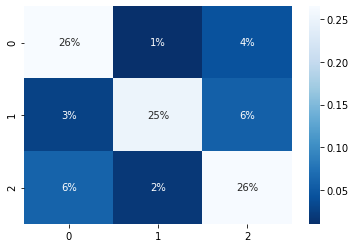

In [14]:
import seaborn as sns
colorMetrics = metrics.confusion_matrix(y_test,y_pred_lgb)/14973#198是行数
sns.heatmap(colorMetrics,annot=True,fmt ='.0%',cmap='Blues_r')#sns.heatmap(colorMetrics,annot=True,fmt='d')

In [15]:
print ('正确分辨率',metrics.accuracy_score(y_test,y_pred_lgb))

正确分辨率 0.7792693514993655
